# **Assignment 4: Supervised learning model: Decision tree.**

Team:
- Alessandra Nayeli Arenas Escalante — 1994279 — N2  
- Andrea Victoria Carrizosa Bernal   — 2049922 — N2  
- Diego Iván Sánchez Vargas          — 2132200 — N2
- Perla Rubí Rodriguez Trejo         — 1997169 — N2

Class: AI  
Professor: Daniel Isaías López Páez  
Date: 17/10/2025


## Introduction
Supervised learning is a fundamental branch of machine learning in which models are trained using labeled data to predict outcomes for new, unseen instances. One of the most interpretable supervised learning techniques is the decision tree model, which represents decision processes in a hierarchical structure similar to a tree. Each internal node corresponds to a decision based on a feature, and each leaf node represents a classification result.

In this project, a decision tree classifier was developed using Python in Google Colab with the “Breast Cancer Wisconsin (Diagnostic)” dataset, which is included in the scikit-learn library. This dataset consists of features derived from digitized images of breast cancer tumors, categorized as malignant or benign. The purpose of this activity was to train and evaluate a decision tree model to distinguish between these two diagnoses effectively. The process followed the structure presented in class: loading libraries and data, performing data preprocessing, training the model, and evaluating its performance using accuracy and classification metrics.


### 1. Load libraries

In this first step, the necessary Python libraries are imported to carry out the implementation of the decision tree model. The project uses the `scikit-learn` library, one of the most widely used tools in data science and machine learning, which provides prebuilt functions for data loading, preprocessing, model creation, training, and evaluation.

The `matplotlib.pyplot` library is imported to visualize the tree structure later, allowing for a clear graphical representation of the model’s decision-making process. Additionally, from `scikit-learn.datasets`, the **Breast Cancer Wisconsin (Diagnostic)** dataset is loaded. This dataset includes various numerical features extracted from digitized images of breast tumor cells, such as radius, texture, perimeter, area, smoothness, and concavity, among others. Each sample is labeled as either *malignant* or *benign* depending on the diagnosis.

Importing these libraries provides the essential computational tools for training, evaluating, and interpreting a supervised learning model.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTreeC
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

### 2. Load data

In this section, the **Breast Cancer Wisconsin (Diagnostic)** dataset is loaded using the `load_breast_cancer()` function from the `scikit-learn` library. This dataset contains 569 samples, each represented by 30 numeric features that describe the characteristics of cell nuclei present in breast tumor images. The corresponding target variable (`target`) contains two labels: 0 for malignant and 1 for benign tumors.

After loading the dataset, the features (`data`) and labels (`target`) are assigned to variables `x` and `y`, respectively. This separation is fundamental because it distinguishes the input variables, which describe the tumor characteristics, from the output variable, which represents the class the model must predict.

At this stage, the dataset is ready for preprocessing, which will ensure that it is properly structured and balanced before being used for model training and testing.



In [ ]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### 3. Data preprocessing

Before training the model, the dataset must be divided into training and testing subsets to evaluate the model’s performance objectively. This is achieved using the `train_test_split` function from the `scikit-learn.model_selection` module. In this project, 80% of the data is allocated for training (`x_train`, `y_train`), while the remaining 20% is reserved for testing (`x_test`, `y_test`).

The purpose of this division is to simulate real-world scenarios where a model is trained on known data but later tested on new, unseen samples. This helps determine how well the model generalizes beyond the examples it has already encountered. The `random_state=42` parameter is specified to ensure reproducibility meaning that the split remains consistent every time the code is executed.

This preprocessing step ensures that the dataset is properly prepared for model training, minimizing bias and improving the reliability of performance evaluation.


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

### 4. Model selection and training

In this step, a **Decision Tree Classifier** is created and trained using the `DecisionTreeClassifier()` function from the `scikit-learn.tree` module. Decision trees are a form of **supervised learning algorithm** used for both classification and regression tasks. They work by recursively splitting the dataset into subsets based on feature values, forming a hierarchical tree-like structure where each internal node represents a decision rule and each leaf node represents a classification outcome.

The model is trained using the `.fit()` method, which takes the training data (`x_train`) and corresponding labels (`y_train`). Through this process, the model learns the relationships between the input features and the target labels, identifying which features are most relevant for distinguishing between malignant and benign tumors.

Decision trees are particularly useful in medical contexts because they offer **interpretability** it is possible to visualize the reasoning behind the model’s decisions, unlike many black-box models. However, they are also prone to **overfitting**, meaning they can perform extremely well on training data but less effectively on unseen data. Therefore, further evaluation is necessary to verify the model’s performance and reliability.


In [ ]:
clf=DTreeC()

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

To evaluate how well the model learned from the training data, the `score()` function is used to calculate the training accuracy. A result close to 1.0 indicates that the model fits the training data very well. However, this might also suggest that the model could be overfitting, so further evaluation on test data is necessary.



In [ ]:
train_accuracy=clf.score(x_train, y_train)
print(train_accuracy)

1.0


### 5. Model testing and evaluation

Once the decision tree has been trained, it is tested using the test dataset (`x_test` and `y_test`). The model makes predictions on unseen data through the `.predict()` function, and these predictions are compared to the actual labels to measure performance. Two key metrics are used for evaluation: **accuracy** and the **classification report**.




In [ ]:
y_vidente=clf.predict(x_test)

A few selected predictions are printed to observe whether the model’s outputs match the true results


In [ ]:
print('Prediction 1:')
print(y_vidente[1])
print(y_test[1])
print('Prediction 2:')
print(y_vidente[15])
print(y_test[15])
print('Prediction 3:')
print(y_vidente[17])
print(y_test[17])
print('Prediction 4:')
print(y_vidente[-1])
print(y_test[-1])

Prediction 1:
0
0
Prediction 2:
0
0
Prediction 3:
1
1
Prediction 4:
0
0


The `accuracy_score` function calculates the proportion of correctly predicted samples, providing a general indicator of how well the model performs. Meanwhile, the `classification_report` function offers a more detailed summary that includes **precision**, **recall**, and **F1-score** for each class. These metrics reveal not only how accurate the model is but also how effectively it identifies malignant and benign tumors without false positives or false negatives.

In this project, the model achieved a very high accuracy, showing strong predictive performance. However, a perfect score on training data (1.0) suggests potential overfitting, meaning the model might have memorized patterns rather than learning generalizable rules. Therefore, interpreting these metrics critically is essential to understanding the model’s limitations and potential improvements.

In [ ]:
accuracy=accuracy_score(y_test, y_vidente)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_vidente, target_names=cancer.target_names))

Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### 6. Visualization of the decision tree

To better understand the logic behind the model’s predictions, the trained decision tree is visualized using the `plot_tree()` function from `scikit-learn.tree`. This graphical representation displays the hierarchical structure of the model, showing how the data is split based on specific feature thresholds.

Two visualizations were generated. The first one represents the **complete decision tree**, showing all nodes and branches created during training. While this provides a full view of the model’s decision-making process, it can be too large and detailed to fit clearly into a document. Therefore, a **second visualization** was created using the parameter `max_depth=3`, which limits the depth of the tree to three levels. This simplified version highlights the most important decision paths while maintaining readability for inclusion in reports.

The plot was saved at **300 DPI resolution** using Matplotlib to ensure high-quality visualization suitable for printed or digital presentation. This visual analysis allows for a clearer understanding of how the model prioritizes certain tumor features—such as mean radius, texture, or smoothness—when classifying a case as malignant or benign.


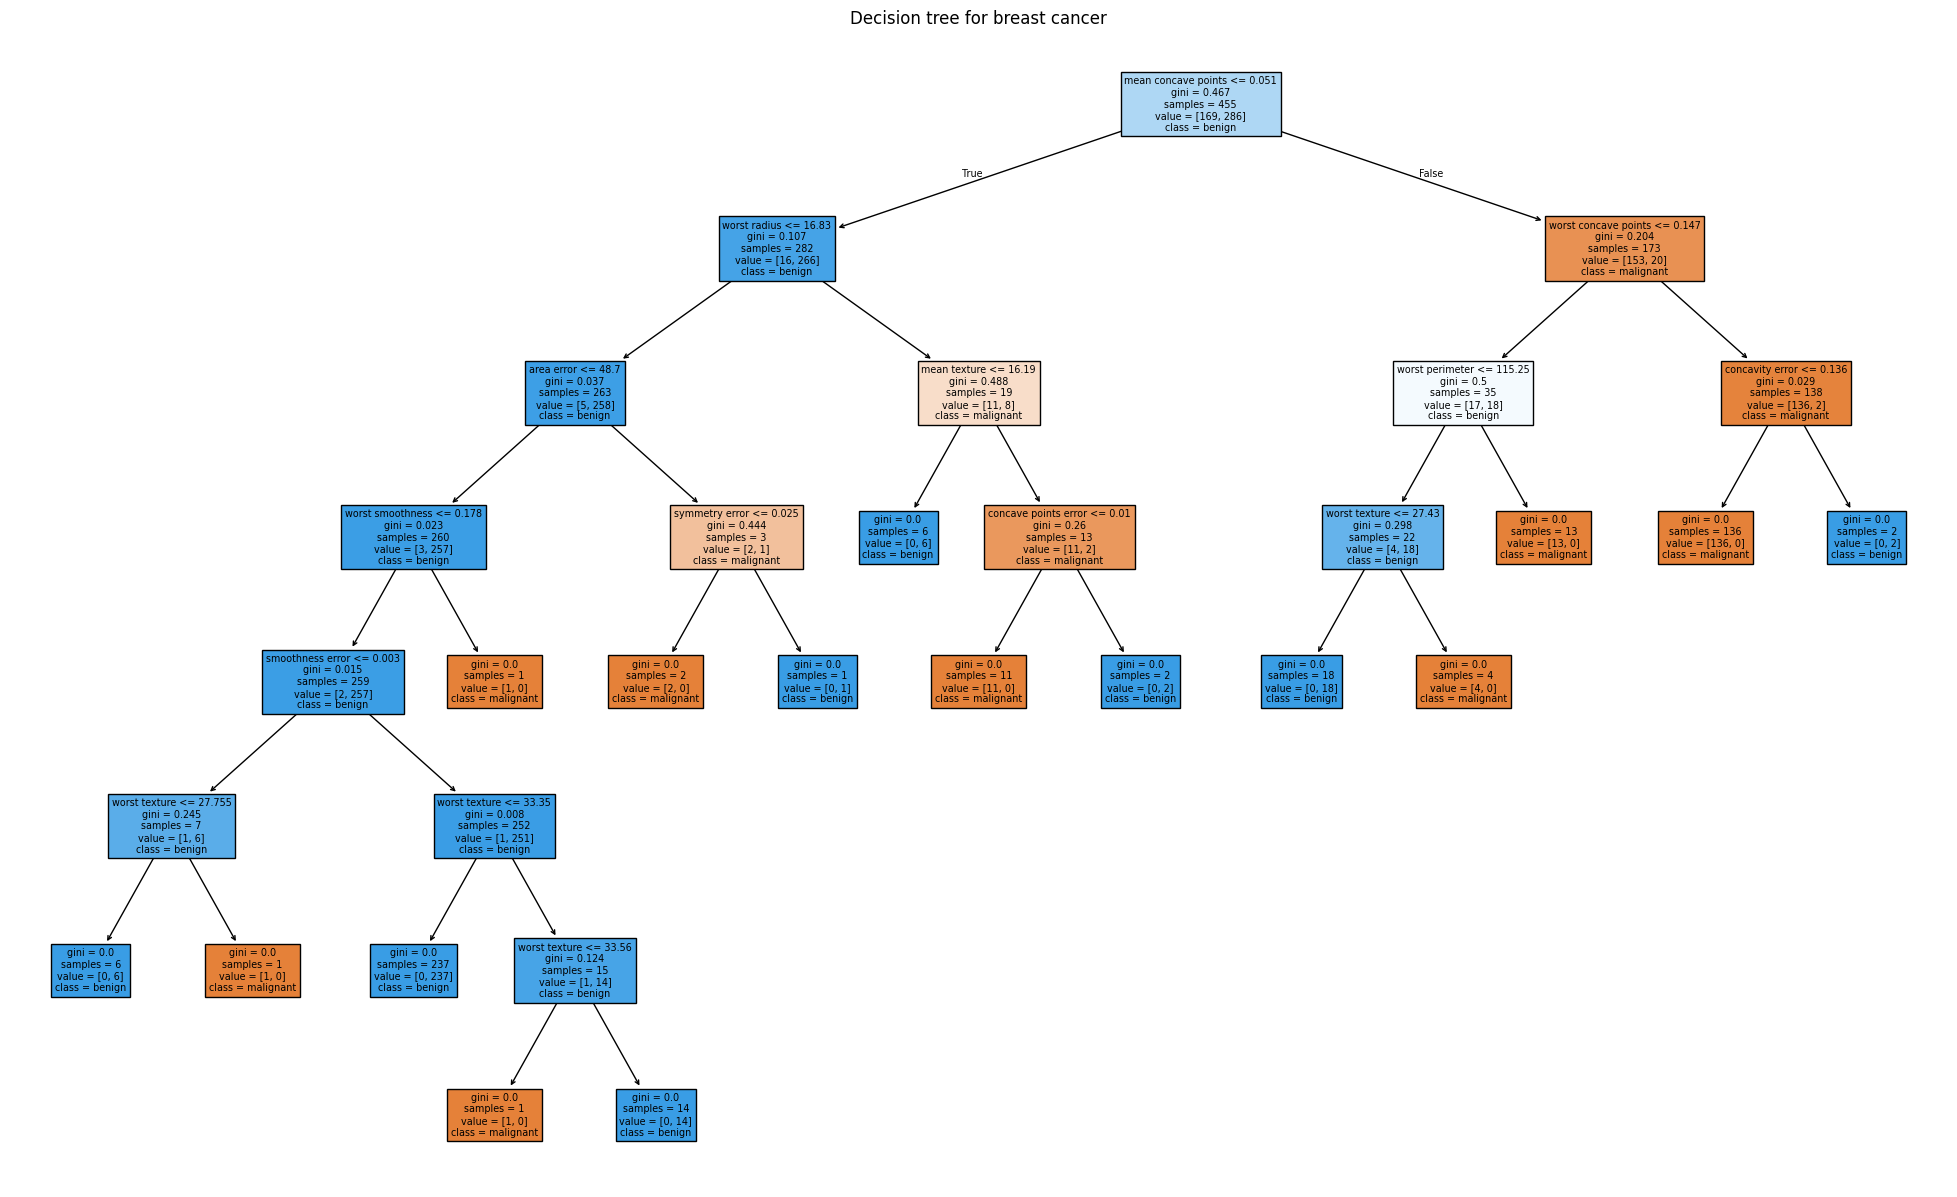

In [ ]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title('Decision tree for breast cancer')
plt.savefig('DecisionTree.png', dpi=300)
plt.show()

Second Visualization

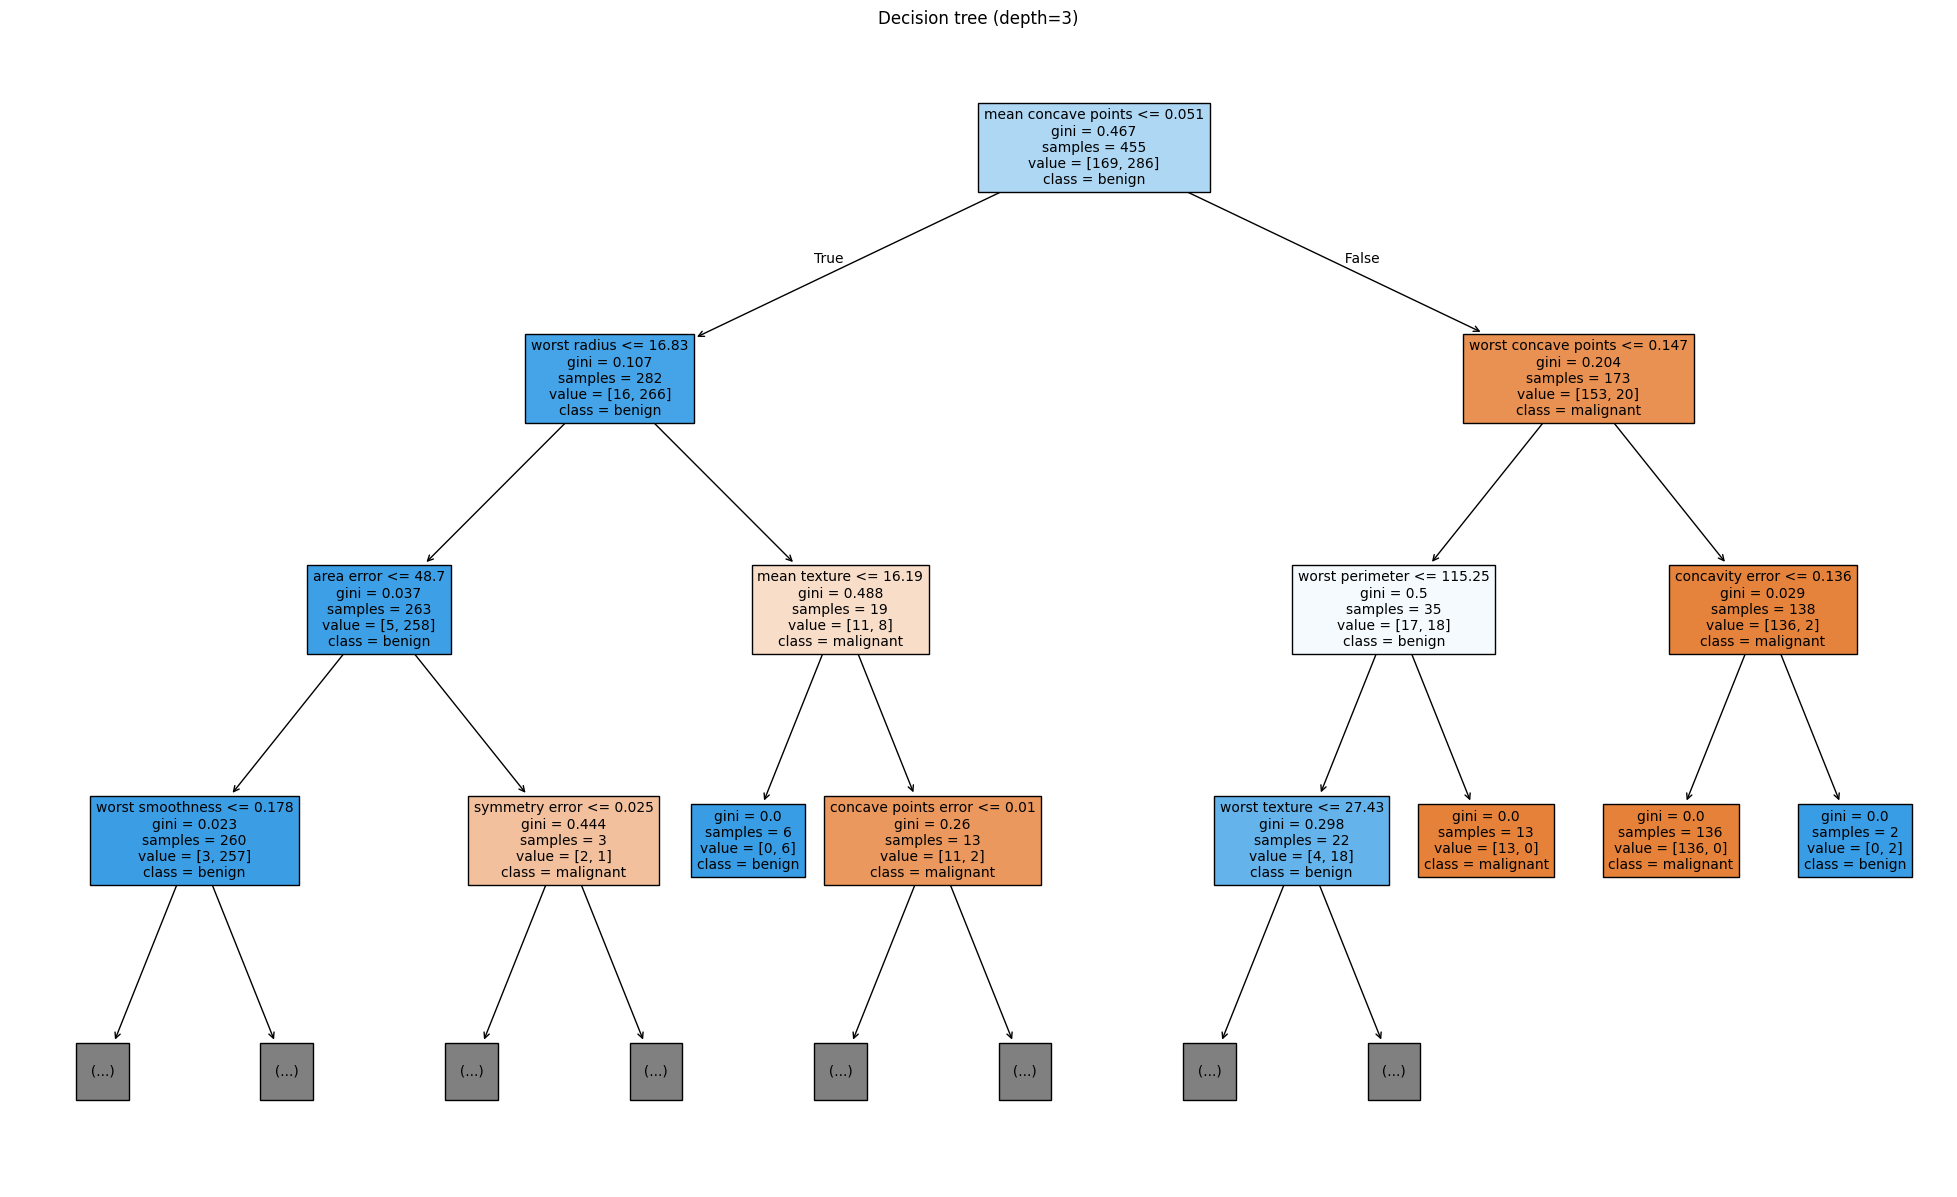

In [ ]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf, max_depth=3, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names, fontsize=10)
plt.title('Decision tree (depth=3)')
plt.savefig('DecisionTree_small.png', dpi=300)
plt.show()

# Group Conclusion
Through this project, our group successfully developed and analyzed a supervised learning model using a decision tree classifier to predict breast cancer diagnoses. The step-by-step process from data loading and preprocessing to training, evaluation, and visualization provided a comprehensive understanding of how machine learning techniques can be applied to real world medical datasets.
The model achieved a high accuracy of approximately 94% on the test data, demonstrating its strong predictive capabilities. However, the perfect accuracy obtained on the training set also revealed a potential risk of overfitting. This means that while the model performs extremely well on the data it has already seen, its performance on completely new data may not be equally strong. Recognizing this limitation is essential, as it underscores the importance of tuning model parameters, pruning trees, or using ensemble methods such as Random Forests to improve generalization.
Another key takeaway was the interpretability of decision trees. Unlike many complex machine learning models, decision trees offer a transparent structure that allows us to visualize how specific features such as mean radius or smoothness influence the prediction. This is particularly important in the medical field, where explainable AI can support clinicians in understanding and trusting model outputs.
